# Lab3.5 Training an emotion classifier with a bag-of-words

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

The goal of this notebook is to show how you can create a classifier that can detect emotions in conversations using the scikit-learn package. 

For the training data, we are going to use data that is produced in the MELD project. MELD stands for Multimodal Emotion Lines Dataset, which is a data set with 13,000 utterances from 1,433 dialogues of the TV-series Friends. Each utterance is annotated with emotion and sentiment labels, and encompasses audio, visual, and textual modalities. The data set is available at:  http:// affective-meld.github.io but the text part of the data has been included here in the data folder. The following paper describes the data set in detail:

S. Poria, D. Hazarika, N. Majumder, G. Naik, E. Cambria, R. Mihalcea. MELD: A Multimodal Multi-Party Dataset for Emotion Recognition in Conversation. ACL 2019: https://arxiv.org/pdf/1810.02508.pdf

The data are labeled with the six basic emotions that Ekman and his team claimed to hold universally across the facial expressions of people from many different cultures:

Ekman, Paul, Wallace V. Friesen, Maureen O'sullivan, Anthony Chan, Irene Diacoyanni-Tarlatzis, Karl Heider, Rainer Krause et al. "Universals and cultural differences in the judgments of facial expressions of emotion." Journal of personality and social psychology 53, no. 4 (1987): 712

<img src="images/ekman-faces.png" width="500" height="600">

The emotions are: anger, disgust, fear, happiness, sadness and surprise.

We assume you have at least studied the previous notebooks in Lab3:

* Lab3.1.ml.basics
* Lab3.2.ml.evaluation
* Lab3.4.ml.sentiment-analysis-with-sklearn

The notebooks more or less follow the structure of Lab3.4.ml.sentiment-analysis-with-sklearn.

**At the end of this notebook, you will be able to**:
* load the training and test data, i.e., utterances with emotion labels
* analyse the training and test data
* represent the text as Bag-of-Words vectors
* train and evaluate a *NaiveBayes Classifier* and a *Support Vector Machine Classifier*
* save, load and apply the classifier to your own set of texts and for future use


### Table of Contents

* [Section 1: Data on utterances and emotions](#section1)
* [Section 2: Using Pandas to load data](#section2)
* [Section 3: Visualising the data](#section3)
* [Section 4: Iterating over a dataframe and getting the values we want](#section4)
* [Section 5:  Training classifiers with our data](#section5)
   * [Section 5.1: Representing the text as numerical vectors](#section5.1)
   * [Section 5.2: Representing text by the information value of the words](#section5.2)
   * [Section 5.3: Training classifiers](#section5.3)
     * [Section 5.3.1: NaiveBayes classifier](#section5.3.1)
     * [Section 5.3.2: Support Vector Machine classifier](#section5.3.2)
   * [Section 5.4: Evaluating the performance of a classifier](#section5.4)
   * [Section 5.5: Balancing the training data](#section5.5)
* [Section 6: Applying the classifier to your own text](#section6)
* [Section 7: How to use the classifier in your own program](#section7)




The overall procedure that we will follow is like this:

1. Load the text with emotion labels from a file and represent the data as a list of utterances and a corresponding list of labels
2. Convert the text to a vector representation so that we can mark which words occur in an utterance and which words do not. This is a Bag-of-Words representation of the text.
3. Convert the labels to a numeric representation
4. Choose a classifier model from *scikit learn*, which is a powerful machine learning package
5. Feed the classifier with the numeric data
6. Test the classifier on the test set, which should be represented in a similar way as the training data
7. Report the test results

The data for this notebook is stored in the so-called CSV for, which stands form Comma Separated Values. This is a text format for tables, also an export format of Excel. CSV is commonly used to store data. We will introduce you to the Pandas package for loading and accessing such data. Pandas is a popular Python package for data.

## 1. Data on utterances and emotions  <a class="anchor" id ="section1"></a> 

We want to train a classifier or machine-learning module with examples of utterances that have been labeled for the emotion that is expressed.
The first step is to get the training data. The training data we are using for detection emotions in text are taken from the following Github repository:

https://github.com/declare-lab/MELD

The MELD project created this data for multimodal emotion detection in conversations using facial, audio and textual signals. Here we are only going to use the textual data. For convenience, the textual data are also provided in this Lab in the 'data/MELD' folder:

* dev_sent_emo.csv
* test_sent_emo.csv
* train_sent_emo.csv

These files are text files in the so-called CSV format (Comma Separated Values), hence the extension ".csv".

When running this notebook, you can browse to the file and open it by double cliking on it. The file 'train_sent_emo.csv' will open in a new TAB which looks as follows:

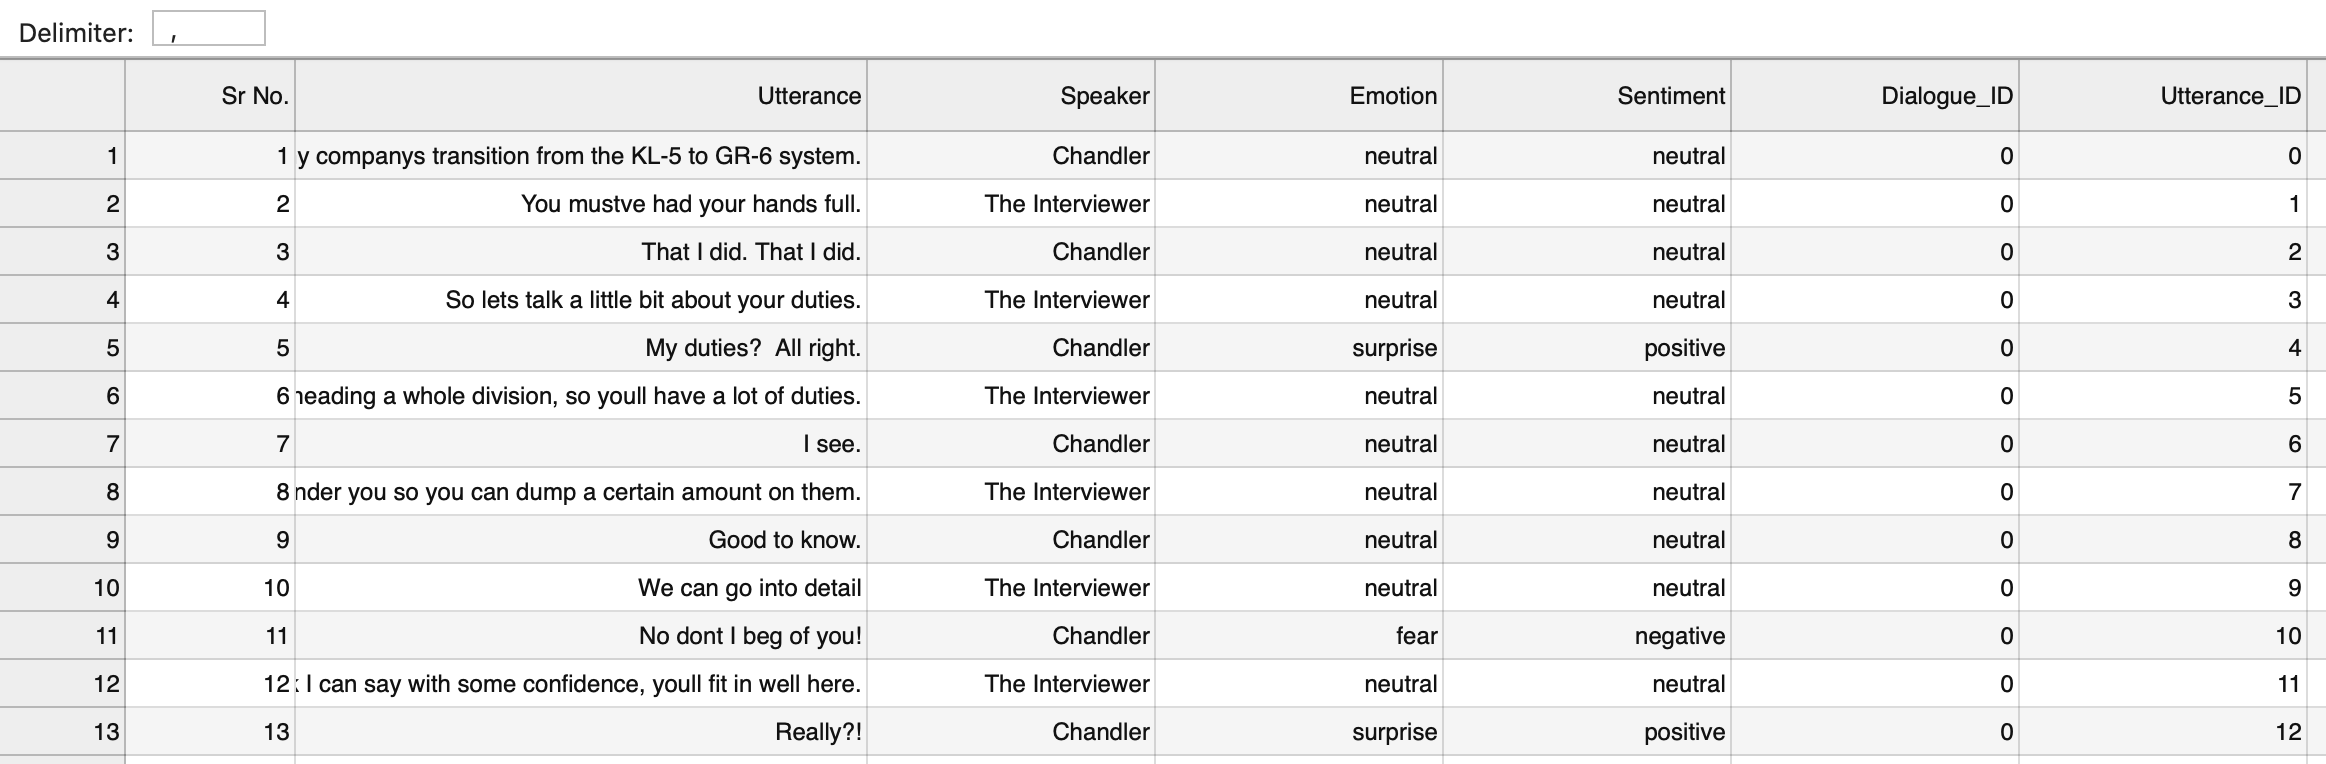

The first line shows the header. You see that the rows and columns with the data are indeed separated by the delimiter ",". You can scroll through the table as in a file editor or spread sheet. CSV files can also be opened in other programs such as Excel and you can save excel files to CSV.

Opening a CSV. file in a notebook is a nice way to quickly get an idea about the content. We can see that there is a column with the utterances and columns for the emotion and the sentiment as annotations. We want to use the utterances and emotion columns for training a classifier to detect the emotion in any utterance. There are other columns as well, but we will ignore these in this notebook.

## 2. Using Pandas to load data <a class="anchor" id ="section2"></a> 

Instead of opening the data file in another TAB in Jupyter notebook, we want to read the data from the file in *memory* in the current notebook and feed it to the learning machine. The CSV file is a text file that you can read as any other text file. You could read it line by line and parse the columns to get the data. However, there is a very powerful package for loading data called `Pandas`  https://pandas.pydata.org, which we are going to use. Eventually, you may want to follow a tutorial on the web on how to use Pandas but for now you can simply follow the instructions below.

Note that Pandas can be tricky when loading your own data. Be aware of that.

Pandas needs to be installed separately on your local machine first. As with other packages, make sure you install it within the same environment that you used to install Anaconda or install it within this notebook through the next cell. Please install pandas locally from the command line, using either of the two following instructions:

* >`conda install pandas`
* >`python -m pip install --upgrade pandas`


In [1]:
%conda install pandas

Solving environment: done

## Package Plan ##

  environment location: /Users/piek/opt/anaconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.9.24          |   py39hecd8cb5_0         155 KB
    ------------------------------------------------------------
                                           Total:         155 KB

The following packages will be UPDATED:

  certifi                          2022.9.14-py39hecd8cb5_0 --> 2022.9.24-py39hecd8cb5_0 None



certifi-2022.9.24    | 155 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


If the installation was succesful, you can now import 'pandas' in this notebook. If Jupyter notebook does not know 'pandas', try restarting the kernel or even restarting Jupyter notebook.

In [3]:
import pandas as pd

If there is no error, you imported pandas and created the instantiation 'pd'. We can now use 'pandas' functions and data elements through the variable 'pd'. Take your time to study the next bit of code so that you understand the individual steps.
 
Our input file is located in the 'data/MELD' folder within this lab folder. We can therefore define the path to this file relative to this notebook. Next, we use the 'pd.read_csv' function to read the data from the file. This read function returns a so-called Dataframe object, which is the object that holds all the data in memory for further processing. We are going to assign this object as a value to the variable 'dftrain'.

In [5]:
# Path to the training data
filepath = './data/MELD/train_sent_emo.csv'

# Create a dataframe object 'dftrain' by readig the file.
dftrain = pd.read_csv(filepath)

As it happens, the data has some problematic strings with encoding problems. The next code removes some of these from the utterances. In most cases, this is not needed and you can use the data as loaded.

In [6]:
# Fixing encoding problems and replacing the 'Utterance' columns with the cleaned strings
dftrain['Utterance'] = dftrain['Utterance'].str.replace("\x92|\x97|\x91|\x93|\x94|\x85", "'")

# We print out the first cell in the 'Utterance' column to inspect it.
dftrain['Utterance'][0]

/var/folders/6w/bw7dqbl9727c48pcjjh32r140000gn/T/ipykernel_91297/1669154111.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dftrain['Utterance'] = dftrain['Utterance'].str.replace("\x92|\x97|\x91|\x93|\x94|\x85", "'")


"also I was the point person on my company's transition from the KL-5 to GR-6 system."

This looks like a normal piece of text, so let us inspect the rest of the data.

There are two useful functions to inspect data in a dataframe. The 'dftrain.info()' function gives us a technical overview of all the data, showing the column names and order, the number of cells with values per column (non-null) and the data type per column.

In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


There are 9,989 indexed rows (entries) in our data frame and all cells have values (non-null). We also see the list of column headers and the data type.

We can now use 'dftrain.head()' function to show the content for head of the table. You can pass in a number for the range of rows you want to see. Here we look at the first ten.

In [8]:
dftrain.head(10)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company's tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must've had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let's talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
5,6,"Now you'll be heading a whole division, so you...",The Interviewer,neutral,neutral,0,5,8,21,"00:16:41,126","00:16:44,337"
6,7,I see.,Chandler,neutral,neutral,0,6,8,21,"00:16:48,800","00:16:51,886"
7,8,But there'll be perhaps 30 people under you so...,The Interviewer,neutral,neutral,0,7,8,21,"00:16:48,800","00:16:54,514"
8,9,Good to know.,Chandler,neutral,neutral,0,8,8,21,"00:16:59,477","00:17:00,478"
9,10,We can go into detail,The Interviewer,neutral,neutral,0,9,8,21,"00:17:00,478","00:17:02,719"


In a similar way, we can also inspect the tail.

In [9]:
dftrain.tail(10)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
9979,10469,How many perfectly fine women are you gonna re...,Monica,surprise,negative,1038,8,2,3,"00:00:28,319","00:00:32,573"
9980,10470,"Hold it, hold it.",Joey,neutral,neutral,1038,9,2,3,"0:00:32,824","0:00:33,456"
9981,10471,I gotta side with Chandler on this one.,Joey,neutral,neutral,1038,10,2,3,"0:00:33,456","0:00:35,556"
9982,10472,"When I first moved to the city, I went out a c...",Joey,disgust,negative,1038,11,2,3,"00:00:35,744","00:00:44,334"
9983,10473,It made me nuts.,Joey,disgust,negative,1038,12,2,3,"00:00:45,462","00:00:46,587"
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"
9988,10478,"That was a good one. For a second there, I was...",Joey,joy,positive,1038,17,2,3,"00:01:08,401","00:01:12,071"


The MELD project also provides a test set, which has the same format as the training set. We are going to load this data as well in a different data frame with the name 'dftest'.

In [10]:
filepath = './data/MELD/test_sent_emo.csv'
dftest = pd.read_csv(filepath)

dftest['Utterance'] = dftest['Utterance'].str.replace("\x92|\x97|\x91|\x93|\x94|\x85", "'")
dftest.info()
dftest.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        2610 non-null   int64 
 1   Utterance     2610 non-null   object
 2   Speaker       2610 non-null   object
 3   Emotion       2610 non-null   object
 4   Sentiment     2610 non-null   object
 5   Dialogue_ID   2610 non-null   int64 
 6   Utterance_ID  2610 non-null   int64 
 7   Season        2610 non-null   int64 
 8   Episode       2610 non-null   int64 
 9   StartTime     2610 non-null   object
 10  EndTime       2610 non-null   object
dtypes: int64(5), object(6)
memory usage: 224.4+ KB


/var/folders/6w/bw7dqbl9727c48pcjjh32r140000gn/T/ipykernel_91297/671847831.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dftest['Utterance'] = dftest['Utterance'].str.replace("\x92|\x97|\x91|\x93|\x94|\x85", "'")


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all you're coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. That's so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"
5,21,"Push 'em out, push 'em out, harder, harder.",Joey,joy,positive,1,2,1,23,"00:10:46,979","00:10:50,148"
6,22,"Push 'em out, push 'em out, way out!",Joey,joy,positive,1,3,1,23,"00:10:50,316","00:10:52,609"
7,23,"Let's get that ball and really move, hey, hey,...",Joey,joy,positive,1,4,1,23,"00:10:52,777","00:10:55,612"
8,24,"Let's' I was just'yeah, right.",Joey,joy,positive,1,5,1,23,"00:10:55,780","00:11:01,242"
9,25,Push!,Joey,joy,positive,1,6,1,23,"0:11:01,410","0:11:01,828"


So there are 2,610 utterances in the test set.

It is always very important to analyse the data a bit more so that you know what you are dealing with. We will use some visualisation functions to do so.

## 3. Visualising the data <a class="anchor" id ="section3"></a> 

There are many ways and packages for visualising the data. Data visualisation is important because it may show biases or inspire **baseline** approaches. Data biases can make your system overfit to certain dominant classes and make it hard to detect rare cases. A baseline system is a solid and simple approach against which you want to compare your trained system. Typical baselines are:  assign random classes as output or always assign the dominant class. Let's see what is the dominant class in our data. Don't worry too much about the next code. It is more for fun.

For visualising our data, we are using the matplotlib package

In [11]:
%conda install matplotlib

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


After succesful installation, we can import it as 'plt': 

In [12]:
import matplotlib.pyplot as plt

There are many options and functions you can use. We will show only a few here. First of all, you can set the size of figure that is used for the visualisation. You can read here more about setting parameters for plotting figures: https://matplotlib.org/stable/tutorials/introductory/customizing.html.

In [17]:
plot_size = plt.rcParams["figure.figsize"]
print('This is the default size:')
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 5
plot_size[1] = 4
print('We change it now to:')
print(plot_size[0]) 
print(plot_size[1])

plt.rcParams["figure.figsize"] = plot_size 

This is the default size:
10.0
8.0
We change it now to:
5
4


Pandas will use the plot *plt* to display the figure that we will generate for the data distribution below.

The dataframe function 'value_counts()' gives the statistics on the values for a column. You can use it on any column in your data and we use it here to get the stats for the *Emotion* column and next use the matplotlib plot function to show the statistics as a pie-chart.

In [29]:
train_emotion_series = dftrain.Emotion.value_counts()

In [30]:
type(train_emotion_series)

pandas.core.series.Series

The value_counts function returns a pandas Series data object, which has a plot function to call the mathlib visualiser with the above settings. For example, if you change the *plt* plot size values, also the dimensions of the next figure change. Try it yourself

<function matplotlib.pyplot.show(close=None, block=None)>

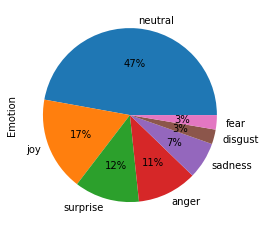

In [31]:
### Selection the Emotion columns, counting the values and plotting it as a 'pie chart'
train_emotion_series.plot(kind='pie', autopct='%1.0f%%')
plt.show

We see that the emotions are not equally distributed over the utterances. Most utterances are neutral (47%) and fear and disgust are rare. This is important to realize when training and testing the classifier.

We can also get information on the distribution over the speakers:

<AxesSubplot:ylabel='Speaker'>

/Users/piek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


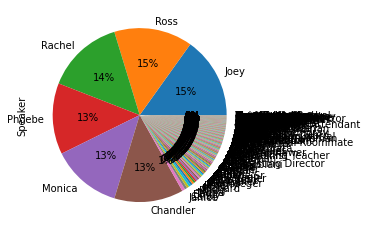

In [32]:
### Selection the Emotion columns, counting the values and plotting it as a 'pie chart'
dftrain.Speaker.value_counts().plot(kind='pie', autopct='%1.0f%%')

We see here that the main characters of the sitcom Friends more or less speak to the same amount but that there are many other speakers that only speak occasionally.

Instead of a pie-chart, you can also use other visualisations such as a bar chart.

<AxesSubplot:>

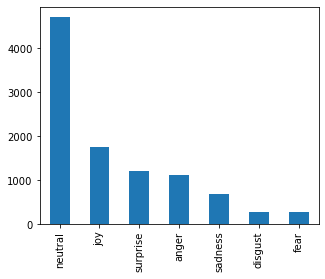

In [33]:
train_emotion_series.sort_values(ascending=False).plot(kind='bar')

On the basis of these stats, we can already have expectations for what a machine will learn from this data: *assign the class 'neutral'!*

A possible baseline would be to always assign 'neutral'. We will try that below.

Lets see if the test data has a similar distribution:

<AxesSubplot:ylabel='Emotion'>

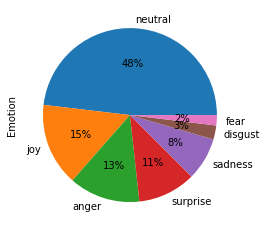

In [34]:
dftest.Emotion.value_counts().plot(kind='pie', autopct='%1.0f%%')

We see that the test data is similar in terms of the distribution of emotions. This means that statistical expectations learned from the training data will be relevant for the test data. A 'neutral' baseline, always assigning the class neutral, will be correct in 48% of the cases.

Think about this for a moment. Is this good or bad? For science or for applications?

We want to build a model that performs better than this baseline. Anything performing at this level or lower did not learn much.

In order to train a model to do better, we need to get all the utterances and the corresponding labels. For this we need to iterate over the Pandas data frame. The next section shows how we can do that.

## 4. Iterating over a dataframe and getting the values we want <a class="anchor" id ="section3"></a> 

Instead of obtaining statistics and visualisations, we want to process the data row by row to get the values we need. What we need are the utterances as input to a vectorizer of sklearn and the corresponding emotion labels as gold labels, as we did before in the previous notebook.

Iterating over the data in a Pandas Dataframe is a bit complex. The next *for*-loop shows you how you can iterate over a specific data segment, in this case the column 'Utterance', and how you can get the *index* number for the row and the value assigned to the variable *utterance*. The Python function *enumerate* converts the column 'Utterance' into an iterable object so that we get the index number and the value, together. The index number is assigned to the variable *index* and the value from the Utterance column to the variable *utterance*. We print the two variables to check them.

We *break* the *for*-loop when the index number equals "10". 

In [35]:
for index, utterance in enumerate(dftrain['Utterance']):
    print(index, utterance)
    if index==10:
        break

0 also I was the point person on my company's transition from the KL-5 to GR-6 system.
1 You must've had your hands full.
2 That I did. That I did.
3 So let's talk a little bit about your duties.
4 My duties?  All right.
5 Now you'll be heading a whole division, so you'll have a lot of duties.
6 I see.
7 But there'll be perhaps 30 people under you so you can dump a certain amount on them.
8 Good to know.
9 We can go into detail
10 No don't I beg of you!


We see the indexes *0* to *10* followed by the utterances from these rows. Using the index number, we can also get the Emotion label from the corresponding row. This is done in Pandas by selecting the column 'Emotion' and passing the index value for the row to the *iloc* structure (note the squared bracktes) to get the cell value.

In [36]:
for index, utterance in enumerate(dftrain['Utterance']):
    emotion_label = dftrain['Emotion'].iloc[index] # this reads as from the column 'Emotion' take the value from the row located at 'index'
    print(index, emotion_label) 
    if index==10:
        break

0 neutral
1 neutral
2 neutral
3 neutral
4 surprise
5 neutral
6 neutral
7 neutral
8 neutral
9 neutral
10 fear


We can see that most of our utterances are *neutral* but we also have one *surprise* and one *fear*. We will use the above *for*-loop to create the data: utterances and their labels, for training a classifier.

## 5. Training classifiers with our data <a class="anchor" id ="section5"></a> 

To train our classifier, we are going to use the *sklearn* and *numpy* packages as we did in the previous notebook. We are also going to filter the text for stopwords using *NLTK*. We further need one specific function from *sklearn* that does all the work for us: *CountVectorizer*. This function can read a list of sentences and create a so-called Bag-of-Words vector representation. See the notebook *Lab3.1.ml.basic.ipynb* and *Lab3.4* for the details. We more or less follow the same steps as in Lab3.4. Hopefully, you start to see the pattern.

We first import the necessary packages.

In [37]:
import sklearn
import numpy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In order to feed *CountVectorizer* with the texts, we need to iterate over the utterances in Pandas dataframe and put them in a list.

In [38]:
training_instances=[]
for utterance in dftrain['Utterance']:
    ### If you have performance issues you can break the loop after 2000 instances to have less data
    #if index==2000:
    #    break
    training_instances.append(utterance)

### print the length of our list to see if al data are loaded
print(len(training_instances))

9989


We now have a list of utterances and can inspect each of them through their index number:

In [39]:
print(training_instances[10])

No don't I beg of you!


To train the machine, we also need a list of labels in the same order that corresponds with the utterances. We create a similar loop for the labels.

In [40]:
training_labels = []
for label in dftrain['Emotion']:
    ### We break the loop after 2000 instances 
    #if index==2000:
    #    break
    training_labels.append(label)
#### Check if we have the same number of labels
print(len(training_labels))

9989


The label for the 11th utterance: *training_instances[10]* can now be retrieved from the list of labels:

In [41]:
print(training_instances[0:10], training_labels[0:10])

["also I was the point person on my company's transition from the KL-5 to GR-6 system.", "You must've had your hands full.", 'That I did. That I did.', "So let's talk a little bit about your duties.", 'My duties?  All right.', "Now you'll be heading a whole division, so you'll have a lot of duties.", 'I see.', "But there'll be perhaps 30 people under you so you can dump a certain amount on them.", 'Good to know.', 'We can go into detail'] ['neutral', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


Obviously, the lists of texts and labels should be of the same length and in the same order.

In [42]:
for utt, em in zip(training_instances[0:10], training_labels[0:10]):
    print(em, utt)

neutral also I was the point person on my company's transition from the KL-5 to GR-6 system.
neutral You must've had your hands full.
neutral That I did. That I did.
neutral So let's talk a little bit about your duties.
surprise My duties?  All right.
neutral Now you'll be heading a whole division, so you'll have a lot of duties.
neutral I see.
neutral But there'll be perhaps 30 people under you so you can dump a certain amount on them.
neutral Good to know.
neutral We can go into detail


In a similar way, we will iterate over the test dataframe and get the utterances and labels for testing.

In [43]:
### the first loop gets the utterances
test_instances = []
for utterance in dftest['Utterance']:
    test_instances.append(utterance)

### We use the same loop for the list of emotion labels that correspond with the vector representations of each utterance
test_labels = []
for label in dftest['Emotion']:
    test_labels.append(label)

print(test_instances[0:10], test_labels[0:10])
print(len(test_instances))
print(len(test_labels))

["Why do all you're coffee mugs have numbers on the bottom?", "Oh. That's so Monica can keep track. That way if one on them is missing, she can be like, 'Where's number 27?!'", "Y'know what?", 'Come on, Lydia, you can do it.', 'Push!', "Push 'em out, push 'em out, harder, harder.", "Push 'em out, push 'em out, way out!", "Let's get that ball and really move, hey, hey, ho, ho.", "Let's'  I was just'yeah, right.", 'Push!'] ['surprise', 'anger', 'neutral', 'neutral', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy']
2610
2610


### 5.1 Representing the text as numerical vectors <a class="anchor" id ="section5.1"></a> 

*Machines don't like words, they prefer numbers.*

The next text overlaps with Lab3.1 and Lab3.4.

*Sklearn* has a powerful function *CountVectorizer* that takes a lists of texts and converts these into a vector representation with numbers. We have explained the basics of this function in notebook: *Lab3.1.ml.basics.ipynb*. Summarising, the function creates a vector with slots that correspond with the words in the total data set. Each position in the vector represents a word. If the word is present in an utterance then that position is turned to '1'. Positions of words that are not present in the utterance keep the value '0'. So if the data set has a total of 1,000 unique words, our vector will have 1,000 slots. Each utterance can be represented by this vector by switching the positions for its words to '1' and keeping the other values as '0'. You can imagine what the size of a vector will be for a data set with hundreds of thousands of text. Luckily, machines can deal with this type of data very well.

When vectors represent a complete set of features but only encode presence of a single feature in the data input, they are called *one-hot-encodings*, i.e. each position encodes whether a feature is present or not. In the case of a bag-of-words presentation, a vector can have several positive values for an utterance. Each text is thus represented by the '1' values in the complete vector.

There are a few parameters that can be set for the CountVectorizer function to determine the words that are represented in the vector. The most important ones are:

* how often does the word occur in the data set
* how to split the text into separate words
* which stop words need to be excluded

Below, we set the minimal frequency to '5', so we ignore words occurring less frequently. We als ignore stopwords as defined by the NLTK library. Finally, we use NLTK to split the text into a list of tokens.

To get an idea what these parameters do, you can experiment with the values and check the effect.

In [44]:
# Turn utterances train data into a vector 
frequency_threshold = 5
utterance_vec =CountVectorizer(min_df=frequency_threshold, # If a token appears fewer times than this, across all documents, it will be ignored
                             tokenizer=nltk.word_tokenize, # we use the nltk tokenizer
                             stop_words=stopwords.words('english')) # stopwords are removed


Do you always want to remove stopwords? Perhaps not. Stopwords are very frequent words in a language, such as "I", "you", "not". They have little content but they could be very important for understanding the emotion in a text.

In [45]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
## If you do not want to remove stopwords use the next call
utterance_vec =CountVectorizer(min_df=frequency_threshold,tokenizer=nltk.word_tokenize) 

We now created an instance of the CountVectorizer *utterance_vec* with the settings as defined. We can now call the functions of CountVectorizer on this instance. The *fit_transform* function will do two things:

<ol>
<li> it will create a dictionary with all unique tokenized words and generate a vector with the length of the number of unique words, such that each position corresponds with a unique word
<li> it will transform the list of text sentences to bag-of-words vector representations
</ol>


In [47]:
training_count_vectors = utterance_vec.fit_transform(training_instances)

We have now created a vector representation *training_count_vectors* of the vocabulary of the full data set for words occurring 5 times or more. Every position in this vector represents a unique word token.

In [48]:
#Total number of word features or the length of the total vector
print(len(utterance_vec.vocabulary_))

1219


The length of the *vocabulary_* property indicates the length of the lexicon and therefore the length of the vectors or the number of feature dimensions.

We can get the *names* of the positions in the vector using the function *get_feature_names*. Below we show the first 50 names.

In [49]:
# First 50 feature names
print(list(utterance_vec.get_feature_names())[:50])

['!', '$', "'", "''", "'cause", "'d", "'em", "'kay", "'ll", "'m", "'re", "'s", "'ve", '(', ',', '--', '.', '..', '...', '....', '.....', '10', '2', '25', '30', '40', '7', '8', ':', ';', '?', '``', 'a', 'able', 'about', 'absolutely', 'accident', 'across', 'actor', 'actual', 'actually', 'after', 'again', 'against', 'age', 'ago', 'ah', 'ahh', 'air', 'alan']


/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


We can also get the position of a specific word using the function *vocabylary_.get*:

In [50]:
# 'husband' is found in the corpus, mapped to index 489
utterance_vec.vocabulary_.get('husband')

520

Our data is a list of vectors which represents a matrix with the text vectors on each row. Using *shape*, we can get the dimensions of the matrix:

In [51]:
print(training_count_vectors.shape)

(9989, 1219)


This means we have a list of *9,989* vectors, each with the length of the size of the vocabulary, if the threshold is set to frequency 5 and you keep the stopwords this is *1217* positions for words. If you remove stopwords it will be *1103* positions. If you change the frequency threshold the number of columns changes as well.

We can convert the *utterance_counts* matrix to an array and get the first element and look at the vector values for slots 100 till 1000:

In [52]:
print(training_count_vectors.toarray()[1][100:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

We can see that most values are zeros and just a few have the value 1. This is what we call a *sparse vector*. A large collection of texts, usually results in large and sparse vectors with most values set to '0' and a few to '1' for each text.

Depending on the settings of the CountVectorizer (frequency threshold, stopwords filtered), the vector will be bigger or smaller. Try to change these settings and see what the effect is on the vector.

Think about this representation for a moment.

### 5.2 Representing text by the information value of the words <a class="anchor" id ="section5.2"></a> 

As we have seen in the previous notebook *Lab3.1.ml.basics.ipynb*, we can also transform the counts into information value scores using the *TfidfTransformer* function.

###IMPORTANT
For the training data we use the **fit_transform** function but for the test data we use the **transform** function. Do you know why?

The shape remains the same but the values are now scores between zero and one.

In [62]:
# Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()

#### For training data we use fit_transform
training_tfidf_vectors = tfidf_transformer.fit_transform(training_count_vectors)

In [63]:
# Same dimensions, now with tf-idf values instead of raw frequency counts
print(training_tfidf_vectors.shape)
print(training_tfidf_vectors.toarray()[1][10:100])

(9989, 1219)
[0.         0.         0.30897589 0.         0.         0.
 0.1017297  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


We see that the non-zero values are now differentiated into real numbers or floats that represent not only presence but also the information value of the word.

Think about these values for this data set. The texts are short and there may not be a topical distribution for these chat utterances. Is *TF.IDF* really useful for this data set and for capturing emotions? We will test this question below by building different classifiers and analysing their performance. 

#### Representing the test data using the vectorizer of the training data

We presented the training data as Bag-of-Word vectors but now we also need to  fit the test data to this Bag-of-Word model. Note that the representation of the test data needs to be compatible with the training data. So this means that the vector for representing the test data has the same length and the same positions as the training data.

Words in the test data that do not occur in the training data can therefore not be represented in these vectors. Instead of *fit_transform*, we need to use the function *transform* for the instance *utterance_vec* that we shaped with the training data. The *transform* function will represent the text according to the vector model of the training data and ignore all out-of-vocabulary words in the test texts.

In [64]:
test_count_vectors = utterance_vec.transform(test_instances)
print(test_count_vectors.shape)
print(test_count_vectors.toarray()[1][10:100])

(2610, 1219)
[0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We can see that the test data has vectors of the same length with many zeros and a few positions scored with one. There are as many vectors as test utterances.

We can use the same transformer we used before to turn the count vectors into weighted vectors:

In [65]:
test_tfidf_vectors = tfidf_transformer.transform(test_count_vectors)

In [66]:
print(test_tfidf_vectors.toarray()[1][10:100])

[0.         0.24242744 0.         0.         0.15031155 0.
 0.13755836 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10022871 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


### 5.3 Training classifiers <a class="anchor" id ="section5.3"></a> 

We can now use the above data representation as training data to build a classifier. We are going to use two different classifiers for demonstration purposes. Do not worry about what the differences are between these two classifiers. This will be explained in more detail in the machine learning for NLP course.

The first classifier is a Naive Bayes classifier. This is a so-called generative model that tries to predict the words that are most likely for each class, in our case emotions. You could say it 'generates' the likelihood of a text for a category. The association between class (emotion) and each word is independent from the other words. So it is a very simple association relation. Naive Bayes classifiers can be useful of you have little data to train and the association is not very complex. You can check out this tutorial for more information: https://web.stanford.edu/class/cs124/lec/naivebayes.pdf.

The second classifier is a Support Vector Machine or SVM. This is a more sophisticated classifier that belongs to the family of discriminative models. This means it learns a weight for each feature (in our case words) to predict the right class (in our case an emotion). SVMs typically try to find the right separation between negative and positive examples for the feauture words by adjusting the weights: all wrong ones on one side and right ones on the other side.

You can check out another tutorial for more information: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In NLP, SVM classifiers have shown to perform very well for many tasks if you have a substantial amount of data.

#### 5.3.1 Naive Bayes classifier <a class="anchor" id ="section5.3.1"></a> 

First, we are going to use a simple Naive Bayes classifier to train a model. Because we have multiple labels, we need a multinomial classifier as we are dealing with *7* classes of emotions.

In [67]:
# Now ready to build a classifier. 
# We will use Multinominal Naive Bayes as our model
from sklearn.naive_bayes import MultinomialNB

The *fit* function of sklearn is the function we use to train the model and it takes as input the training data and the labels.

In [68]:
# Train a Multimoda Naive Bayes classifier
mn_nb_clf = MultinomialNB().fit(training_tfidf_vectors, training_labels)


After training the classifier, we can apply it to test data that is represented in the same way. For this we use the function *predict*

In [69]:
# Predicting the Test set results, find macro recall
y_pred_nb = mn_nb_clf.predict(test_tfidf_vectors)

The predictions are a list of numeric values that represent the emotions. The values are listed in the order of the test data.

In [70]:
print('Predictions from the NB classifer', y_pred_nb)

Predictions from the NB classifer ['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']


#### 5.3.2 Support Vector Machine classifier <a class="anchor" id ="section5.3.2"></a> 

You can easily choose another classifier in sklearn and feed it with exactly the same data. We next are going to use a Support Vector Machine classifier, which was one of the most effective classifiers before the Deep Learning paradignm.

In [71]:
from sklearn import svm

svm_linear_clf = svm.LinearSVC(max_iter=2000)

svm_linear_clf.fit(training_tfidf_vectors, training_labels)


LinearSVC(max_iter=2000)

In [72]:
# Predicting the Test set results, find macro recall
y_pred_svm = svm_linear_clf.predict(test_tfidf_vectors)

In [73]:
print('Predictions from the SVM classifier', y_pred_svm)

Predictions from the SVM classifier ['neutral' 'neutral' 'neutral' ... 'anger' 'neutral' 'neutral']


### 5.4 Evaluating the performance of a classifier <a class="anchor" id ="section5.4"></a> 

Sklearn provides functions to obtain the recall, precision and f-measure for the test set that we separated from the training data. To do this, we only need to provide the true values of the test set and the list of predicted values and pass it to the *sklearn.metrics* functions to compute the precision, recall and f-score. You can see in the functions below that these functions have parameters for *y_true*, *y_pred* and the way of averaging. We pass *y_test*, which is the list of emotions from the data set, as the value for *y_true*, and we pass *pred_nb* as the list of emotions that is predicted by the NaiveBayes classifier as a value for *y_pred*. We choose *micro_averaging* to aggregate the scores from the different emotions.

In [74]:
nb_micro_recall= sklearn.metrics.recall_score(y_true=test_labels,
                             y_pred=y_pred_nb,
                             average='micro')


print('NB recall', nb_micro_recall)

NB recall 0.5432950191570881


We can see here that the NB classifier has an average recall of 0.54, which is not very good.

We can make a similar call for the predictions from the SVM classifier by assigning the values *y_pred_svm* to the parameter *y_pred*.

In [75]:
svm_micro_recall= sklearn.metrics.recall_score(y_true=test_labels,
                             y_pred=y_pred_svm,
                             average='micro')

print('SVM recall', svm_micro_recall)

SVM recall 0.5808429118773947


The SVM scores a little bit higher but still not good enough. Remember that a baseline that always assigns the label **neutral** would score .48.

Let's see what the precision and f-scores are. For this we replace *recall_score* with *precision_score* and *f1_score* respectively.

In [76]:
nb_micro_precision= sklearn.metrics.precision_score(y_true=test_labels,
                             y_pred=y_pred_nb,
                             average='micro')

svm_micro_precision= sklearn.metrics.precision_score(y_true=test_labels,
                             y_pred=y_pred_svm,
                             average='micro')

print('NB precision', nb_micro_precision)
print('SVM precision', svm_micro_precision)

NB precision 0.5432950191570881
SVM precision 0.5808429118773947


In [77]:
nb_micro_f_score= sklearn.metrics.f1_score(y_true=test_labels,
                             y_pred=y_pred_nb,
                             average='micro')
svm_micro_f_score= sklearn.metrics.f1_score(y_true=test_labels,
                             y_pred=y_pred_svm,
                             average='micro')

print('NB f-score', nb_micro_f_score)
print('SVM f-score', svm_micro_f_score)

NB f-score 0.5432950191570881
SVM f-score 0.5808429118773947


Recall, precision and f1 scores are the same. Let's see what happens if we use *macro averaging*.

In [78]:
nb_macro_f_score= sklearn.metrics.f1_score(y_true=test_labels,
                             y_pred=y_pred_nb,
                             average='macro')
svm_macro_f_score= sklearn.metrics.f1_score(y_true=test_labels,
                             y_pred=y_pred_svm,
                             average='macro')

print('NB f-score', nb_macro_f_score)
print('SVM f-score', svm_macro_f_score)

NB f-score 0.2201994085608514
SVM f-score 0.32328472620302995


QUESTION: Why is the macro average score so much lower than the micro average score? Think about the distribution of the emotion labels.

Instead of the averaged results, sklearn can also generate a report per model. Let's generate such a report for both classifiers and compare them. This is the code to do that.

In [79]:
from sklearn.metrics import classification_report

report = classification_report(test_labels,y_pred_nb,digits = 7)
print('BoW TFIDF Naive Bayes  --------------------------------------------------------------')
print('Word freqeuncy threshold', frequency_threshold)
print(report)

report = classification_report(test_labels,y_pred_svm,digits = 7)
print('BoW TFIDF SVM LINEAR ----------------------------------------------------------------')
print('Word freqeuncy threshold', frequency_threshold)

print(report)

BoW TFIDF Naive Bayes  --------------------------------------------------------------
Word freqeuncy threshold 5
              precision    recall  f1-score   support

       anger  0.6315789 0.0347826 0.0659341       345
     disgust  0.0000000 0.0000000 0.0000000        68
        fear  0.0000000 0.0000000 0.0000000        50
         joy  0.5260417 0.2512438 0.3400673       402
     neutral  0.5356201 0.9697452 0.6900850      1256
     sadness  1.0000000 0.0144231 0.0284360       208
    surprise  0.6885246 0.2989324 0.4168734       281

    accuracy                      0.5432950      2610
   macro avg  0.4831093 0.2241610 0.2201994      2610
weighted avg  0.5760834 0.5432950 0.4403284      2610

BoW TFIDF SVM LINEAR ----------------------------------------------------------------
Word freqeuncy threshold 5
              precision    recall  f1-score   support

       anger  0.3895349 0.1942029 0.2591876       345
     disgust  0.3333333 0.0588235 0.1000000        68
        fear  

/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In the classification report we see the precision, recall and f1-score for each label and averagwed scores: accuracy, macro avg and weighted (or micro) averaged. Als not the support column that indicates how many test cases there are in each category and in total. 

We can see that the performance varies a lot across the emotions and across the classifiers. E.g. *anger* and *surprise* have highest precision for NB but not for SVM. NB has zero scores for 'disgust' and 'fear', whereas SVM still has results albeit very low scores. SVM has for most emotions a higher recall and the averaged results and the f1 scores are higher for SVM. Neutral has the highest f1-score for both due to the high recall. Clearly this is because the data is biased towards neutral.

Sklearn can also generate a confusion matrix, which indicates which classes are confused with which other classes (false positives).

In [80]:
print('Confusion matrix NB')
print(svm_linear_clf.classes_)
cf_matrix_nb = sklearn.metrics.confusion_matrix(test_labels,y_pred_nb)
print(cf_matrix_nb)

print('Confusion matrix SVM')
print(svm_linear_clf.classes_)
cf_matrix_svm = sklearn.metrics.confusion_matrix(test_labels,y_pred_svm)
print(cf_matrix_svm)

Confusion matrix NB
['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']
[[  12    0    0   30  289    0   14]
 [   0    0    0    5   59    0    4]
 [   1    0    0    4   45    0    0]
 [   4    0    0  101  294    0    3]
 [   1    0    0   21 1218    0   16]
 [   1    0    0    6  197    3    1]
 [   0    0    0   25  172    0   84]]
Confusion matrix SVM
['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']
[[  67    3    1   77  149    7   41]
 [   5    4    0    9   40    1    9]
 [   6    0    1    7   27    4    5]
 [  23    2    0  185  158    7   27]
 [  34    2    2   52 1104   22   40]
 [  19    1    0   21  131   24   12]
 [  18    0    0   42   86    4  131]]


The diagonals represent the correctly classified test utterances. All others indicate the confusions, where another class was wrongly assigned. It is clear the the fourth column has most results, indicating that the neutral class is often assigned when an emotion should be detected.

Using some ready made package *Seaborn* we can nicely visualise a confusion matrix generated by sklearn.

['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']


<AxesSubplot:>

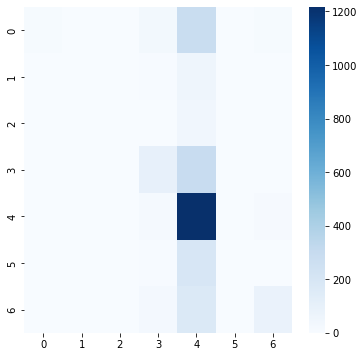

In [88]:
import seaborn as sns

### change the plot size to make it more readable as a table
plot_size[0] = 6
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

print(svm_linear_clf.classes_)
sns.heatmap(cf_matrix_nb, cmap='Blues')

['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']


<AxesSubplot:>

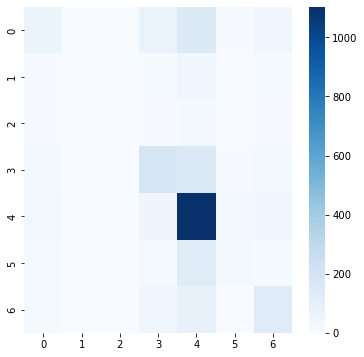

In [89]:
print(svm_linear_clf.classes_)
sns.heatmap(cf_matrix_svm, cmap='Blues')

Such confusion matrices are very important to get a better understanding of what a system learned and for which categories it gets confused. We can see here that category '4' (neutral) clearly spills over to the other categories, being too dominant. From the other categories only **joy** and **surprise** show some confusion with the others.

Here is a blog that shows various options for visualisation:

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


### 5.5 Balancing training data <a class="anchor" id ="section5.5"></a> 

Our system performs just above the baseline of the dominant class *neutral*: .48. What can you do if one class is so dominant?

Well, we can simply reduce the training data for the dominant class.

In [90]:
sample = 5

balanced_training_instances=[]
balanced_training_labels=[]

cnt_neutral = 0
for index, utterance in enumerate(dftrain['Utterance']):
    emotion_label = dftrain['Emotion'].iloc[index] # this reads as from the column 'Emotion' take the value from the row located at 'index'
    if emotion_label =='neutral':
        cnt_neutral += 1
        if cnt_neutral % sample == 0:
            balanced_training_instances.append(utterance)
            balanced_training_labels.append(emotion_label)
    else:
        balanced_training_instances.append(utterance)
        balanced_training_labels.append(emotion_label)

In [91]:
balanced_df = pd.DataFrame(balanced_training_labels, columns = ['Emotion'])
print(balanced_df.info())
print(balanced_df.head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6221 entries, 0 to 6220
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  6221 non-null   object
dtypes: object(1)
memory usage: 48.7+ KB
None
     Emotion
0   surprise
1    neutral
2       fear
3    neutral
4   surprise
5   surprise
6    sadness
7   surprise
8       fear
9    neutral
10       joy
11   sadness
12  surprise
13   disgust
14   sadness


<AxesSubplot:>

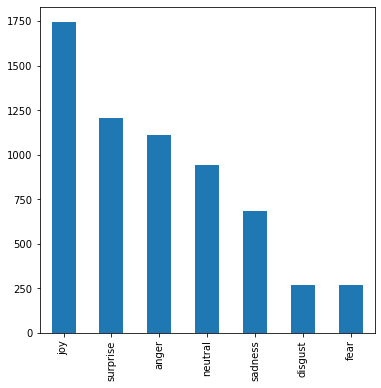

In [92]:
balanced_df.Emotion.value_counts().sort_values(ascending=False).plot(kind='bar')

Will this work? Figure it out your self by retraining and testing a classifier.

## 6. Applying a classifier to your own text <a class="anchor" id ="section6"></a> 

Now we can apply our classifier to new data. We represent our text as a list of sentences. You can see it is easy to make up your own text or to load it from a file.

In [93]:
# some utterances
some_chat = ['That is sweet of you', 
               'You are so funny', 
               'Are you a man or a woman?', 
               'Chatbots make me sad and feel lonely.', 
               'Your are stupid and boring.', 
               'Two thumbs up', 
               'I fell asleep halfway through this conversation', 
               'Wow, I am really amazed.', 
               'You are amazing.',
             'I feel so low being in isolation',
             'People dumping waste are horrible',
             'Its awful that you cannot stop smoking',
             'Dogs scare me',
             'I am afraid I will get sick at work',
             'I run away when I see a dog',
             'When do you start your job?'
            ]


len(some_chat)

16

Next, we define the list of labels that go with our chat.

In [94]:
some_chat_gold = ['joy', 'joy', 'neutral', 'sadness', 'anger', 'joy', 'anger', 'surprise', 'joy', 'sadness', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'neutral']

It is important to realise that our classifier is trained with words as features that are derived from the training data. Our data may contain words that do not occur in the training data. Remember that we created large vectors. 

To be able to apply our model to these text, we need to represent the text using the same vectors as we used for training the model. The sklearn transformer function does this work for you.

In [95]:
# We re-use utterance_vec to transform it in the same way as the training data
new_counts = utterance_vec.transform(some_chat)
new_counts.shape

(16, 1219)

Note that words in our new utterances that are NOT in the training data, will not be represented as there are no slots in the vectors from the training data.

In [96]:
# we compute tf idf values
some_chat_tfidf = tfidf_transformer.transform(new_counts)
some_chat_tfidf.shape

(16, 1219)

In [97]:
# have classifier make a prediction
some_chat_pred = svm_linear_clf.predict(some_chat_tfidf)

In [98]:
# print out results ()
for review, gold_label, predicted_label in zip(some_chat, some_chat_gold,some_chat_pred):
    
    print('%s => %s,%s' % (review, gold_label,predicted_label))

That is sweet of you => joy,joy
You are so funny => joy,joy
Are you a man or a woman? => neutral,neutral
Chatbots make me sad and feel lonely. => sadness,sadness
Your are stupid and boring. => anger,anger
Two thumbs up => joy,neutral
I fell asleep halfway through this conversation => anger,anger
Wow, I am really amazed. => surprise,surprise
You are amazing. => joy,joy
I feel so low being in isolation => sadness,anger
People dumping waste are horrible => disgust,neutral
Its awful that you cannot stop smoking => disgust,neutral
Dogs scare me => fear,anger
I am afraid I will get sick at work => fear,neutral
I run away when I see a dog => fear,neutral
When do you start your job? => neutral,neutral


We now have a list of the our chat utterances and the labels but we do not know how sure the classifier is for each output. In order to get these probabilities, we need to use the function *predict_proba*. It is a function from sklearn that gives an array with the probabilities for each class. This is what it generates for our seven classes

In [99]:
report = classification_report(some_chat_gold,some_chat_pred,digits = 7)
print('BOW SVM LINEAR ----------------------------------------------------------------')
print('Word freqeuncy threshold', frequency_threshold)
print(report)

BOW SVM LINEAR ----------------------------------------------------------------
Word freqeuncy threshold 5
              precision    recall  f1-score   support

       anger  0.5000000 1.0000000 0.6666667         2
     disgust  0.0000000 0.0000000 0.0000000         2
        fear  0.0000000 0.0000000 0.0000000         3
         joy  1.0000000 0.7500000 0.8571429         4
     neutral  0.2857143 1.0000000 0.4444444         2
     sadness  1.0000000 0.5000000 0.6666667         2
    surprise  1.0000000 1.0000000 1.0000000         1

    accuracy                      0.5625000        16
   macro avg  0.5408163 0.6071429 0.5192744        16
weighted avg  0.5357143 0.5625000 0.4990079        16



/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7. Reusing your model and classifier in another program <a class="anchor" id ="section7"></a> 

When we are happy about our classifier, we may want to save it so that we can use it in another notebook or program. Python provides a package called *pickle* with which you can save what is in memory (our model) to a file on disk as so-called binary data. You can then load this file at a later point to recreate the object in your code. Let's see how that works for our classifiers by saving them in the subfolder "models". Remember you need to have a folder in this lab called models. If not create it first before running the next code.

In [101]:
import pickle

# save the countvectorizer
filename_vectorizer = './models/utterance_vec.sav'
pickle.dump(utterance_vec, open(filename_vectorizer, 'wb'))

# save the tfidf transformer
filename_transformer = './models/utterance_transf.sav'
pickle.dump(tfidf_transformer, open(filename_transformer, 'wb'))

# save the classifier to disk
filename_classifier = './models/svm_linear_clf_bow.sav'
pickle.dump(svm_linear_clf, open(filename_classifier, 'wb'))

Now check your *models* folder to see the four data files that you saved. You can now save and stop this notebook and use these classifiers some other time. We next show how to load them again to re-classify the above text.

In [102]:

# some time later...
 
# load the classifier and the vectorizer from disk
loaded_classifier = pickle.load(open(filename_classifier, 'rb'))
loaded_vectorizer = pickle.load(open(filename_vectorizer, 'rb'))
loaded_transformer = pickle.load(open(filename_transformer, 'rb'))

counts_from_loaded_model = loaded_vectorizer.transform(some_chat)
some_chat_tfidf = loaded_transformer.transform(counts_from_loaded_model)
pred_from_loaded_classifier = loaded_classifier.predict(some_chat_tfidf)

for review, predicted_label in zip(some_chat, pred_from_loaded_classifier):
    print('%s => %s' % (review, predicted_label))

That is sweet of you => joy
You are so funny => joy
Are you a man or a woman? => neutral
Chatbots make me sad and feel lonely. => sadness
Your are stupid and boring. => anger
Two thumbs up => neutral
I fell asleep halfway through this conversation => anger
Wow, I am really amazed. => surprise
You are amazing. => joy
I feel so low being in isolation => anger
People dumping waste are horrible => neutral
Its awful that you cannot stop smoking => neutral
Dogs scare me => anger
I am afraid I will get sick at work => neutral
I run away when I see a dog => neutral
When do you start your job? => neutral


# End of this notebook